In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import seaborn as sns

import tensorflow as tf
import ssl
from tensorflow import keras

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context

print('Tensorflow Version: ', tf.__version__)


Tensorflow Version:  2.15.0


## Part 1: SK-Learn (Fill In)

SK-Learn Documentation: https://scikit-learn.org/stable/ <br> 
Geeks4Geeks (More specific to this example): https://www.geeksforgeeks.org/python-linear-regression-using-sklearn/#

Please don't use chatgpt :D

In [3]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

In [4]:
#  CRIM     per capita crime rate by town
#  ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
#  INDUS    proportion of non-retail business acres per town
#  CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
#  NOX      nitric oxides concentration (parts per 10 million)
#  RM       average number of rooms per dwelling
#  AGE      proportion of owner-occupied units built prior to 1940
#  DIS      weighted distances to five Boston employment centres
#  RAD      index of accessibility to radial highways
#  TAX      full-value property-tax rate per $10,000
#  PTRATIO  pupil-teacher ratio by town
#  B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
#  LSTAT    % lower status of the population
#  MEDV     Median value of owner-occupied homes in $1000's

boston_df = pd.DataFrame(data, columns=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT'])
boston_df['PRICE'] = target
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [5]:
boston_df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


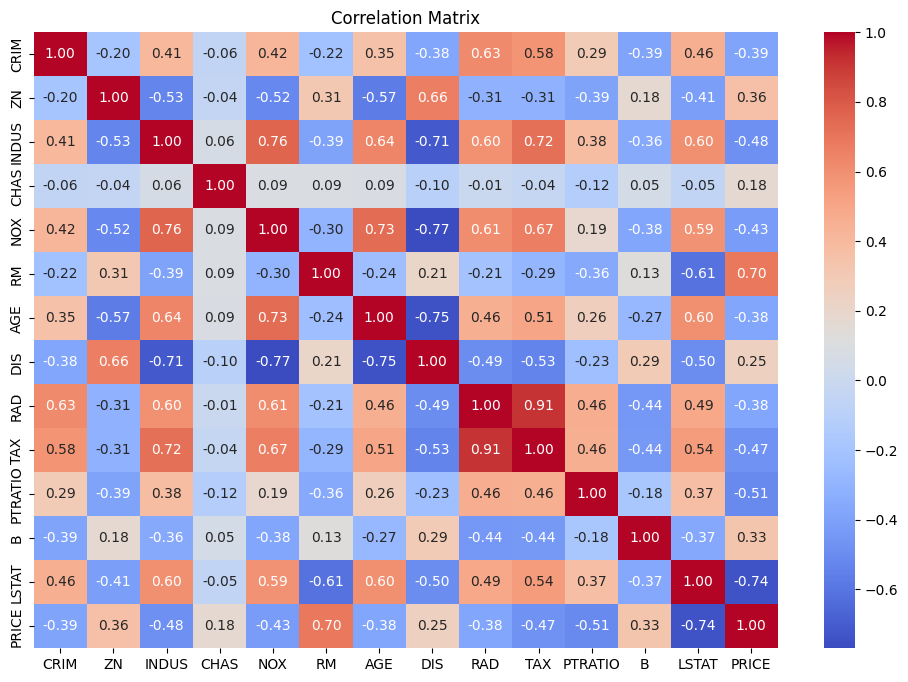

In [6]:
# Visualize the correlation matrix
corr_matrix = boston_df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

Fill in the blank here :)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(boston_df.drop('PRICE', axis=1), boston_df['PRICE'], test_size=0.2, random_state=42) #(Features, target, optimal test size)?

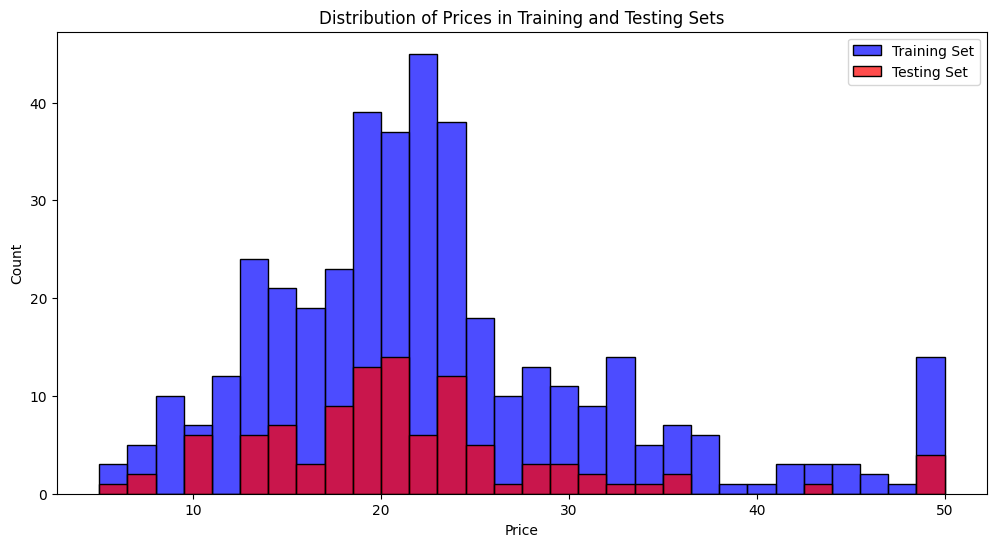

In [10]:
plt.figure(figsize=(12, 6))
sns.histplot(y_train, bins=30, color='blue', label='Training Set', alpha=0.7)
sns.histplot(y_test, bins=30, color='red', label='Testing Set', alpha=0.7)
plt.title('Distribution of Prices in Training and Testing Sets')
plt.xlabel('Price')
plt.legend()
plt.show()

Fill in the blank also here :)

Mean Squared Error: 24.29111947497374


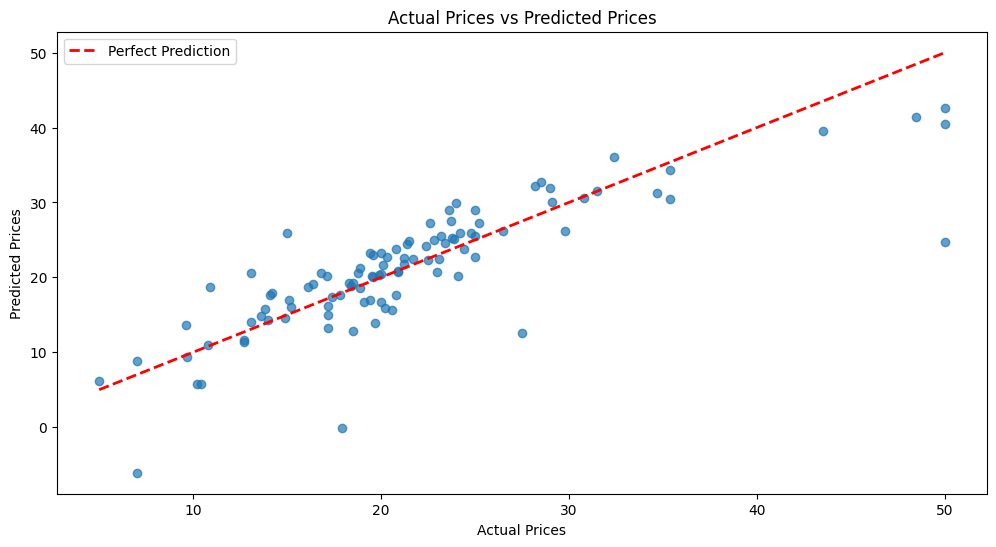

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)                         #How do we train a model in SK-learn?
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# Visualize predicted vs actual prices
plt.figure(figsize=(12, 6))
plt.scatter(y_test, predictions, alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2, label='Perfect Prediction')
plt.title('Actual Prices vs Predicted Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()

## Part 2: Keras (Just for Show on MNIST)

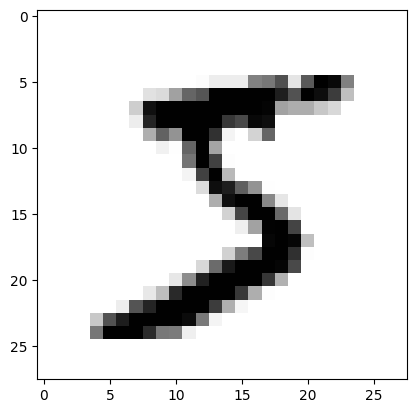

In [12]:
mnist = tf.keras.datasets.mnist # keras provides several datasets available within the library itself
(x_train, y_train), (x_test, y_test) = mnist.load_data() # assigning the data

plt.imshow(x_train[0], cmap = plt.cm.binary) # graphical representation of one of the values of the set

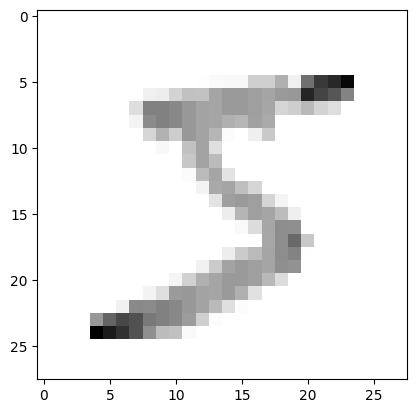

In [13]:
x_train = tf.keras.utils.normalize(x_train, axis=1) # keras allows you to much more easily normalize you data
x_test = tf.keras.utils.normalize(x_test, axis=1)

plt.imshow(x_train[0], cmap = plt.cm.binary) # graphical representation of one of the values of the normalized set

In [14]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28,1))) # converts your data to a one-dimensional array, in this case the images in our set were 28x28
model.add(tf.keras.layers.Dense(128,activation='relu')) # adding layers to our model
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax')) # final layer should have units equal to the amount of your classification labels

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['sparse_categorical_accuracy']) 
# optimizers are the functions that tweak the attributes of your neural network,
# loss is the function that calculates the difference between predicted and actual values
# metrics are the things that you want to track

In [15]:
model.fit(x_train,y_train,epochs=3) # actual training function for our neural network

Epoch 1/3


1875/1875 [==============================] - 7s 3ms/step - loss: 0.2619 - sparse_categorical_accuracy: 0.9235
Epoch 2/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1072 - sparse_categorical_accuracy: 0.9667
Epoch 3/3
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0729 - sparse_categorical_accuracy: 0.9773
